# 라이브러리 불러오기

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os

print(tf.__version__)

2.3.0


# 데이터셋 불러오기 및 정규화


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0

11493376/11490434 [==============================] - 0s 0us/step


# CNN 모델 생성

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

# 모델 컴파일 및 훈련

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0172 - accuracy: 0.9942
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0121 - accuracy: 0.9959
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0105 - accuracy: 0.9966
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0090 - accuracy: 0.9971
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0097 - accuracy: 0.9967


# 모델 평가

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0454 - accuracy: 0.9904


In [ ]:
print(test_acc)

0.9904000163078308


# 임의의 데이터로 테스트

7
7
6
9
9
0


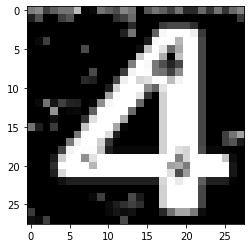

In [ ]:
image_list = os.listdir('./imgs')

roi_list = []

for img in image_list:
  roi = cv.imread('./imgs/'+img)
  roi_gray = cv.cvtColor(roi,cv.COLOR_BGR2GRAY)
  thr = cv.adaptiveThreshold(roi_gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 2)
  thr = cv.resize(thr, dsize=(28, 28), interpolation=cv.INTER_AREA)
  thr = thr / 255.0
  thr = thr.reshape((28,28,1))

  roi_list.append(thr)

for test in roi_list:
  res = np.argmax(model.predict(np.expand_dims(test,0)))
  print(res)

In [ ]:
roi = cv.imread("./imgs/4.png")

roi_gray = cv.cvtColor(roi,cv.COLOR_BGR2GRAY)
thr = cv.adaptiveThreshold(roi_gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 2)
thr = cv.resize(thr, dsize=(28, 28), interpolation=cv.INTER_AREA)
thr = thr.reshape((28,28,1))
thr = thr / 255.0

np.argmax(model.predict(np.expand_dims(thr,0)))

0